In [43]:
# Complete Data Science Pipeline Tutorial
## Space Debris Dataset Analysis

**Dataset**: `space_decay.csv`

**Project Objective**: Analyze satellite and space debris orbital data to predict object characteristics and understand decay patterns.

---

This notebook covers:
1. Data Loading & Exploration
2. Data Cleaning
3. Data Preprocessing
4. Exploratory Data Analysis (EDA) & Visualization
5. Feature Engineering
6. Model Building & Evaluation


SyntaxError: invalid syntax (1683369922.py, line 4)

## Phase 1: Data Loading & Initial Exploration

**Libraries Used**:
- `pandas`: Data manipulation and analysis
- `numpy`: Numerical operations
- `matplotlib` & `seaborn`: Visualization
- `scikit-learn`: Machine learning algorithms


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("Libraries loaded successfully!")


Libraries loaded successfully!


In [ ]:
# Load the dataset
df = pd.read_csv('space_decay.csv')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")


Dataset loaded successfully!
Shape: 14372 rows × 40 columns


In [ ]:
# Display first few rows
df.head()


,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,EPOCH,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,EPHEMERIS_TYPE,CLASSIFICATION_TYPE,NORAD_CAT_ID,ELEMENT_SET_NO,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
0,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T06:46:11,18 SPCS,ARIANE 42P+ DEB,1992-072J,EARTH,TEME,UTC,SGP4,2021-10-31T22:46:50.340864,2.92,0.65,7.72,90.24,243.12,38.78,0,U,26741,999,23588,0.02,0.00,0.00,20668.62,492.86,27784.87,796.10,DEBRIS,MEDIUM,FR,1992.00,FRGUI,NaN,3195178,188614016,0 ARIANE 42P+ DEB,1 26741U 92072J 21304.94919376 .00000883 0...,2 26741 7.7156 90.2410 6528926 243.1216 38...
1,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,SL-8 DEB,1979-028C,EARTH,TEME,UTC,SGP4,2021-10-31T16:32:17.360448,13.75,0.00,82.92,299.11,158.91,201.33,0,U,26743,999,50124,0.00,0.00,0.00,7358.04,104.69,1002.51,957.30,DEBRIS,SMALL,CIS,1979.00,PKMTR,NaN,3194950,188593285,0 SL-8 DEB,1 26743U 79028C 21304.68908982 .00000079 0...,2 26743 82.9193 299.1120 0030720 158.9093 201...
2,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T06:26:11,18 SPCS,GSAT 1,2001-015A,EARTH,TEME,UTC,SGP4,2021-11-01T05:22:43.421952,1.04,0.02,12.17,16.54,250.12,146.29,0,U,26745,999,7798,0.00,-0.00,0.00,41197.85,1386.98,35797.70,33841.74,PAYLOAD,LARGE,IND,2001.00,SRI,NaN,3195026,188609573,0 GSAT 1,1 26745U 01015A 21305.22411368 -.00000165 0...,2 26745 12.1717 16.5368 0237386 250.1248 146...
3,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:07:15,18 SPCS,CZ-4 DEB,1999-057MB,EARTH,TEME,UTC,SGP4,2021-10-31T11:11:24.198720,14.78,0.01,98.48,8.72,37.38,323.16,0,U,26754,999,10204,0.00,0.00,0.00,7015.08,97.46,679.47,594.42,DEBRIS,SMALL,PRC,1999.00,TSC,NaN,3194431,188556894,0 CZ-4 DEB,1 26754U 99057MB 21304.46625230 .00002265 0...,2 26754 98.4781 8.7205 0060618 37.3771 323...
4,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,CZ-4 DEB,1999-057MC,EARTH,TEME,UTC,SGP4,2021-10-31T17:46:46.681248,14.72,0.01,98.42,122.07,345.16,27.61,0,U,26755,999,9622,0.00,0.00,0.00,7031.40,97.80,697.04,609.49,DEBRIS,SMALL,PRC,1999.00,TSC,NaN,3194950,188592541,0 CZ-4 DEB,1 26755U 99057MC 21304.74081807 .00002610 0...,2 26755 98.4232 122.0724 0062255 345.1605 27...


In [ ]:
# Display last few rows
df.tail()


,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,EPOCH,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,EPHEMERIS_TYPE,CLASSIFICATION_TYPE,NORAD_CAT_ID,ELEMENT_SET_NO,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
14367,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-29T18:22:04,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,2021-10-12T13:30:18.264096,15.47,0.00,99.01,214.68,219.16,140.88,0,U,87970,999,37922,0.01,0.00,0.00,6804.88,93.11,434.84,418.65,TBA,NaN,NaN,NaN,NaN,NaN,3191411,188414015,0 TBA - TO BE ASSIGNED,1 87970U 21285.56271139 +.00354808 +0...,2 87970 99.0098 214.6827 0011899 219.1613 140...
14368,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:06:35,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,2021-10-31T06:42:22.912704,14.97,0.01,99.03,141.12,76.89,283.85,0,U,89171,999,32962,0.00,0.00,0.00,6955.07,96.21,615.60,538.26,TBA,NaN,NaN,NaN,NaN,NaN,3194430,188550573,0 TBA - TO BE ASSIGNED,1 89171U 21304.27943186 +.00020950 +0...,2 89171 99.0272 141.1159 0055597 76.8926 283...
14369,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:07:15,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,2021-10-31T03:45:38.282976,12.91,0.06,31.99,262.93,162.78,199.29,0,U,270007,999,9113,-0.00,-0.00,0.00,7675.82,111.54,1732.69,862.67,TBA,NaN,NaN,NaN,NaN,NaN,3194431,188561362,0 TBA - TO BE ASSIGNED,1 T0007U 21304.15669309 -.00000068 0...,2 T0007 31.9916 262.9339 0566728 162.7824 199...
14370,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:07:15,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,2021-10-31T09:00:47.481120,14.25,0.01,98.68,348.31,187.03,173.01,0,U,270207,999,9893,0.00,0.00,0.00,7188.20,101.09,851.92,768.22,TBA,NaN,NaN,NaN,NaN,NaN,3194431,188561387,0 TBA - TO BE ASSIGNED,1 T0207U 21304.37554955 .00000690 0...,2 T0207 98.6758 348.3068 0058220 187.0288 173...
14371,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,2021-10-31T19:02:10.993920,12.95,0.00,90.28,327.59,238.90,120.92,0,U,270288,999,7553,-0.00,-0.00,0.00,7659.26,111.18,1303.77,1258.48,TBA,NaN,NaN,NaN,NaN,NaN,3194950,188596191,0 TBA - TO BE ASSIGNED,1 T0288U 21304.79318280 -.00000108 0...,2 T0288 90.2762 327.5871 0029565 238.9003 120...


In [ ]:
# Get dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14372 entries, 0 to 14371
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CCSDS_OMM_VERS       14372 non-null  int64  
 1   COMMENT              14372 non-null  object 
 2   CREATION_DATE        14372 non-null  object 
 3   ORIGINATOR           14372 non-null  object 
 4   OBJECT_NAME          14372 non-null  object 
 5   OBJECT_ID            14333 non-null  object 
 6   CENTER_NAME          14372 non-null  object 
 7   REF_FRAME            14372 non-null  object 
 8   TIME_SYSTEM          14372 non-null  object 
 9   MEAN_ELEMENT_THEORY  14372 non-null  object 
 10  EPOCH                14372 non-null  object 
 11  MEAN_MOTION          14372 non-null  float64
 12  ECCENTRICITY         14372 non-null  float64
 13  INCLINATION          14372 non-null  float64
 14  RA_OF_ASC_NODE       14372 non-null  float64
 15  ARG_OF_PERICENTER    14372 non-null 

In [ ]:
# Statistical summary of numerical columns
df.describe()


,CCSDS_OMM_VERS,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,EPHEMERIS_TYPE,NORAD_CAT_ID,ELEMENT_SET_NO,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,LAUNCH_DATE,DECAY_DATE,FILE,GP_ID
count,14372.00,14372.00,14372.00,14372.00,14372.00,14372.00,14372.00,14372.00,14372.00,14372.00,14372.00,14372.00,14372.00,14372.00,14372.00,14372.00,14372.00,14372.00,14333.00,0.00,14372.00,14372.00
mean,2.00,12.46,0.07,74.35,182.35,165.98,191.02,0.00,39558.16,999.00,32960.20,-0.00,0.00,0.00,10636.19,223.52,5721.06,2795.04,2004.51,NaN,3194186.13,188563823.26
std,0.00,4.51,0.18,29.63,116.72,104.46,109.87,0.00,7619.85,0.00,28449.54,0.03,0.00,0.00,9580.63,446.52,13016.30,7943.05,13.57,NaN,3119.12,139361.55
min,2.00,0.05,0.00,0.00,0.02,0.01,0.00,0.00,26741.00,999.00,0.00,-0.80,-0.01,-0.00,6542.85,87.78,183.39,73.28,1961.00,NaN,3142499.00,186092637.00
25%,2.00,13.45,0.00,53.06,71.99,77.36,90.00,0.00,33965.75,999.00,5832.25,0.00,0.00,0.00,6956.25,96.23,599.88,546.12,1997.00,NaN,3194431.00,188566486.50
50%,2.00,14.28,0.00,86.37,189.46,150.48,206.96,0.00,40165.50,999.00,28944.50,0.00,0.00,0.00,7177.55,100.86,843.69,702.43,2002.00,NaN,3194950.00,188598562.50
75%,2.00,14.96,0.01,98.57,292.48,258.33,284.16,0.00,45173.50,999.00,61422.25,0.00,0.00,0.00,7468.06,107.05,1207.92,831.96,2018.00,NaN,3195064.00,188610661.75
max,2.00,16.40,0.90,144.59,359.97,359.99,359.98,0.00,270288.00,999.00,99945.00,0.60,0.23,0.00,304049.64,27808.43,372136.40,224547.02,2021.00,NaN,3195727.00,188625007.00


In [ ]:
# Check column names
print("Column Names:")
print(df.columns.tolist())


Column Names:
['CCSDS_OMM_VERS', 'COMMENT', 'CREATION_DATE', 'ORIGINATOR', 'OBJECT_NAME', 'OBJECT_ID', 'CENTER_NAME', 'REF_FRAME', 'TIME_SYSTEM', 'MEAN_ELEMENT_THEORY', 'EPOCH', 'MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'EPHEMERIS_TYPE', 'CLASSIFICATION_TYPE', 'NORAD_CAT_ID', 'ELEMENT_SET_NO', 'REV_AT_EPOCH', 'BSTAR', 'MEAN_MOTION_DOT', 'MEAN_MOTION_DDOT', 'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS', 'OBJECT_TYPE', 'RCS_SIZE', 'COUNTRY_CODE', 'LAUNCH_DATE', 'SITE', 'DECAY_DATE', 'FILE', 'GP_ID', 'TLE_LINE0', 'TLE_LINE1', 'TLE_LINE2']


---
## Phase 2: Data Cleaning

### Common Issues to Address:
1. **Missing Values**: Can lead to errors or biased results
2. **Duplicate Rows**: Inflate statistics and cause overfitting
3. **Outliers**: Extreme values that may distort analysis
4. **Data Types**: Ensure correct format for each column

### ⚠️ Pitfalls to Avoid:
- Dropping too many rows (lose valuable information)
- Filling missing values without understanding why they're missing
- Removing outliers that are legitimate data points


In [ ]:
# Check for missing values
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_table = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
})
missing_table = missing_table[missing_table['Missing Count'] > 0].sort_values(
    'Percentage', ascending=False
)

print("Missing Values Summary:")
print(missing_table)


Missing Values Summary:
              Missing Count  Percentage
DECAY_DATE            14372      100.00
RCS_SIZE                198        1.38
OBJECT_ID                39        0.27
COUNTRY_CODE             39        0.27
LAUNCH_DATE              39        0.27
SITE                     39        0.27


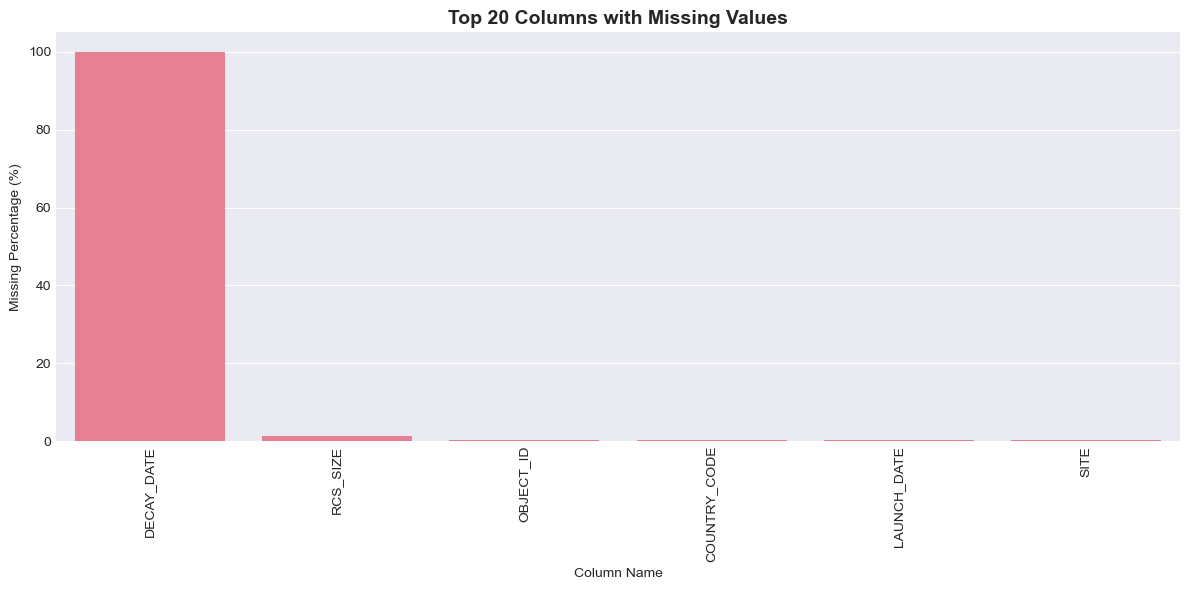

In [ ]:
# Visualize missing data
if len(missing_table) > 0:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=missing_table.index[:20], y=missing_table['Percentage'][:20])
    plt.xticks(rotation=90)
    plt.title('Top 20 Columns with Missing Values', fontsize=14, weight='bold')
    plt.xlabel('Column Name')
    plt.ylabel('Missing Percentage (%)')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found!")


In [ ]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print(f"Percentage of duplicates: {(duplicate_count/len(df))*100:.2f}%")
    # Remove duplicates
    df = df.drop_duplicates()
    print(f"Duplicates removed. New shape: {df.shape}")
else:
    print("No duplicates found!")


Number of duplicate rows: 0
No duplicates found!


In [ ]:
# Handle missing values - Strategy depends on percentage
# Rule of thumb:
# - <5% missing: Can drop rows
# - 5-30% missing: Impute (fill) values
# - >30% missing: Consider dropping column

# Create a copy for cleaning
df_clean = df.copy()

# Drop columns with >70% missing values
threshold = 0.7
cols_to_drop = missing_table[missing_table['Percentage'] > threshold * 100].index.tolist()
if cols_to_drop:
    print(f"Dropping columns with >{threshold*100}% missing: {cols_to_drop}")
    df_clean = df_clean.drop(columns=cols_to_drop)

print(f"\nCleaned dataset shape: {df_clean.shape}")


Dropping columns with >70.0% missing: ['DECAY_DATE']

Cleaned dataset shape: (14372, 39)


In [ ]:
# Identify numerical and categorical columns
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols[:10]}...")
print(f"\nCategorical columns ({len(categorical_cols)}): {categorical_cols[:10]}...")


Numerical columns (21): ['CCSDS_OMM_VERS', 'MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'EPHEMERIS_TYPE', 'NORAD_CAT_ID', 'ELEMENT_SET_NO']...

Categorical columns (18): ['COMMENT', 'CREATION_DATE', 'ORIGINATOR', 'OBJECT_NAME', 'OBJECT_ID', 'CENTER_NAME', 'REF_FRAME', 'TIME_SYSTEM', 'MEAN_ELEMENT_THEORY', 'EPOCH']...


In [ ]:
# Fill missing values in numerical columns with median (robust to outliers)
for col in numerical_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

print("Numerical missing values filled with median")


Numerical missing values filled with median


In [ ]:
# Fill missing values in categorical columns with mode (most frequent value)
for col in categorical_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].mode()[0] if not df_clean[col].mode().empty else 'Unknown', inplace=True)

print("Categorical missing values filled with mode")


Categorical missing values filled with mode


In [ ]:
# Verify no missing values remain
print(f"Remaining missing values: {df_clean.isnull().sum().sum()}")


Remaining missing values: 0


In [ ]:
# Detect outliers using IQR method (Interquartile Range)
# Only check key numerical columns to avoid too much computation
key_numerical_cols = [col for col in numerical_cols if col in df_clean.columns][:10]

outlier_summary = {}
for col in key_numerical_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)][col]
    outlier_summary[col] = len(outliers)

outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier Count'])
outlier_df = outlier_df[outlier_df['Outlier Count'] > 0].sort_values('Outlier Count', ascending=False)
print("Outlier Detection (IQR Method):")
print(outlier_df)


Outlier Detection (IQR Method):
              Outlier Count
MEAN_MOTION            2371
ECCENTRICITY           2025
NORAD_CAT_ID             39


**Note on Outliers**: In space data, many "outliers" are legitimate (e.g., highly eccentric orbits). We'll keep them but be aware during modeling.


---
## Phase 3: Data Preprocessing

### Key Steps:
1. **Feature Scaling**: Normalize numerical features to same scale
2. **Encoding Categorical Variables**: Convert text to numbers
3. **Feature Selection**: Keep relevant features

### ⚠️ Pitfalls to Avoid:
- Scaling before splitting data (causes data leakage)
- Using one-hot encoding on high-cardinality columns
- Not scaling data when using distance-based algorithms


In [ ]:
# Analyze categorical columns for encoding strategy
print("Categorical Column Analysis:")
for col in categorical_cols[:10]:  # Analyze first 10
    unique_count = df_clean[col].nunique()
    print(f"{col}: {unique_count} unique values")
    if unique_count <= 10:
        print(f"  Values: {df_clean[col].value_counts().head().to_dict()}")
    print()


Categorical Column Analysis:
COMMENT: 1 unique values
  Values: {'GENERATED VIA SPACE-TRACK.ORG API': 14372}

CREATION_DATE: 191 unique values

ORIGINATOR: 1 unique values
  Values: {'18 SPCS': 14372}

OBJECT_NAME: 5372 unique values

OBJECT_ID: 14333 unique values

CENTER_NAME: 1 unique values
  Values: {'EARTH': 14372}

REF_FRAME: 1 unique values
  Values: {'TEME': 14372}

TIME_SYSTEM: 1 unique values
  Values: {'UTC': 14372}

MEAN_ELEMENT_THEORY: 1 unique values
  Values: {'SGP4': 14372}

EPOCH: 13944 unique values



In [ ]:
# Select target variable for modeling
# Example: Predict OBJECT_TYPE (classification problem)
if 'OBJECT_TYPE' in df_clean.columns:
    target_column = 'OBJECT_TYPE'
    print(f"Target variable: {target_column}")
    print(f"Target distribution:\n{df_clean[target_column].value_counts()}")
elif 'RCS_SIZE' in df_clean.columns:
    target_column = 'RCS_SIZE'
    print(f"Target variable: {target_column}")
    print(f"Target distribution:\n{df_clean[target_column].value_counts()}")
else:
    target_column = None
    print("No suitable target column found. Will create one later.")


Target variable: OBJECT_TYPE
Target distribution:
OBJECT_TYPE
DEBRIS         8431
PAYLOAD        4950
ROCKET BODY     744
TBA             247
Name: count, dtype: int64


In [ ]:
# Select relevant features for modeling
# Focus on orbital parameters and physical characteristics
feature_columns = []

# Key numerical features
potential_features = [
    'MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'RA_OF_ASC_NODE',
    'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'BSTAR', 'MEAN_MOTION_DOT',
    'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS', 'REV_AT_EPOCH'
]

for feature in potential_features:
    if feature in df_clean.columns:
        feature_columns.append(feature)

# Key categorical features
categorical_features = ['COUNTRY_CODE', 'CLASSIFICATION_TYPE']
for feature in categorical_features:
    if feature in df_clean.columns:
        feature_columns.append(feature)

print(f"Selected {len(feature_columns)} features for modeling:")
print(feature_columns)


Selected 15 features for modeling:
['MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'BSTAR', 'MEAN_MOTION_DOT', 'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS', 'REV_AT_EPOCH', 'COUNTRY_CODE', 'CLASSIFICATION_TYPE']


In [ ]:
# Create a modeling dataset
if target_column:
    # Filter out rows with missing target
    df_model = df_clean[feature_columns + [target_column]].copy()
    df_model = df_model.dropna(subset=[target_column])
    print(f"Modeling dataset shape: {df_model.shape}")
else:
    df_model = df_clean[feature_columns].copy()
    print(f"Feature dataset shape: {df_model.shape}")


Modeling dataset shape: (14372, 16)


In [ ]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df_model.select_dtypes(include=['object']).columns:
    if col != target_column:
        le = LabelEncoder()
        df_model[col] = le.fit_transform(df_model[col].astype(str))
        label_encoders[col] = le
        print(f"Encoded {col}: {len(le.classes_)} unique values")

# Encode target if it's categorical
if target_column and df_model[target_column].dtype == 'object':
    le_target = LabelEncoder()
    df_model[f'{target_column}_encoded'] = le_target.fit_transform(df_model[target_column])
    label_encoders[target_column] = le_target
    print(f"\nTarget classes: {le_target.classes_}")


Encoded COUNTRY_CODE: 99 unique values
Encoded CLASSIFICATION_TYPE: 1 unique values

Target classes: ['DEBRIS' 'PAYLOAD' 'ROCKET BODY' 'TBA']


---
## Phase 4: Exploratory Data Analysis (EDA) & Visualization

### Visualization Tools:
- **Matplotlib**: Base plotting library
- **Seaborn**: Statistical visualizations
- **Plotly** (optional): Interactive plots

### Common Visualizations:
1. Distribution plots (histograms, box plots)
2. Correlation heatmaps
3. Scatter plots for relationships
4. Bar charts for categorical data


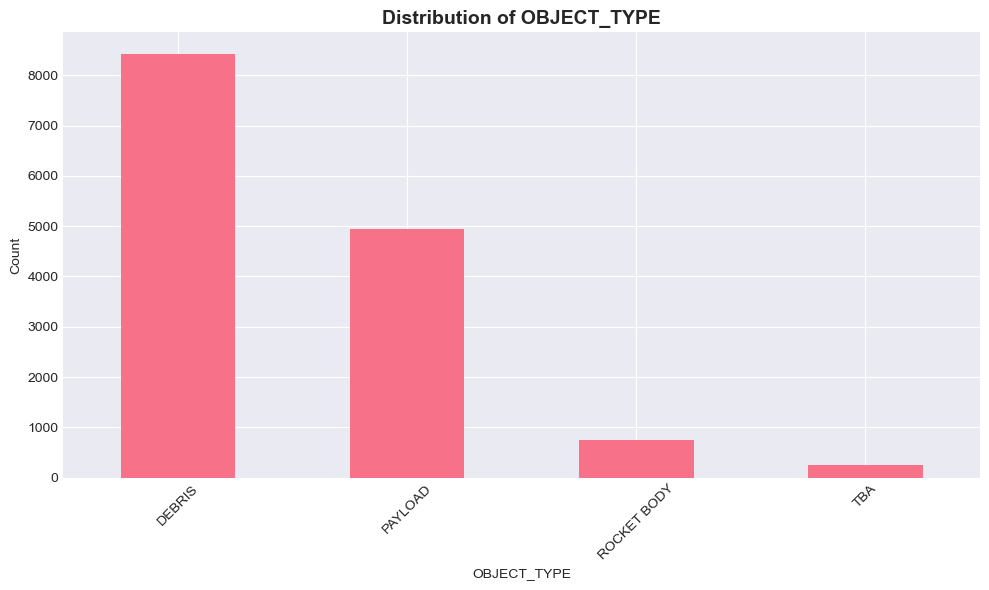

In [ ]:
# Visualize target distribution
if target_column:
    plt.figure(figsize=(10, 6))
    df_clean[target_column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {target_column}', fontsize=14, weight='bold')
    plt.xlabel(target_column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


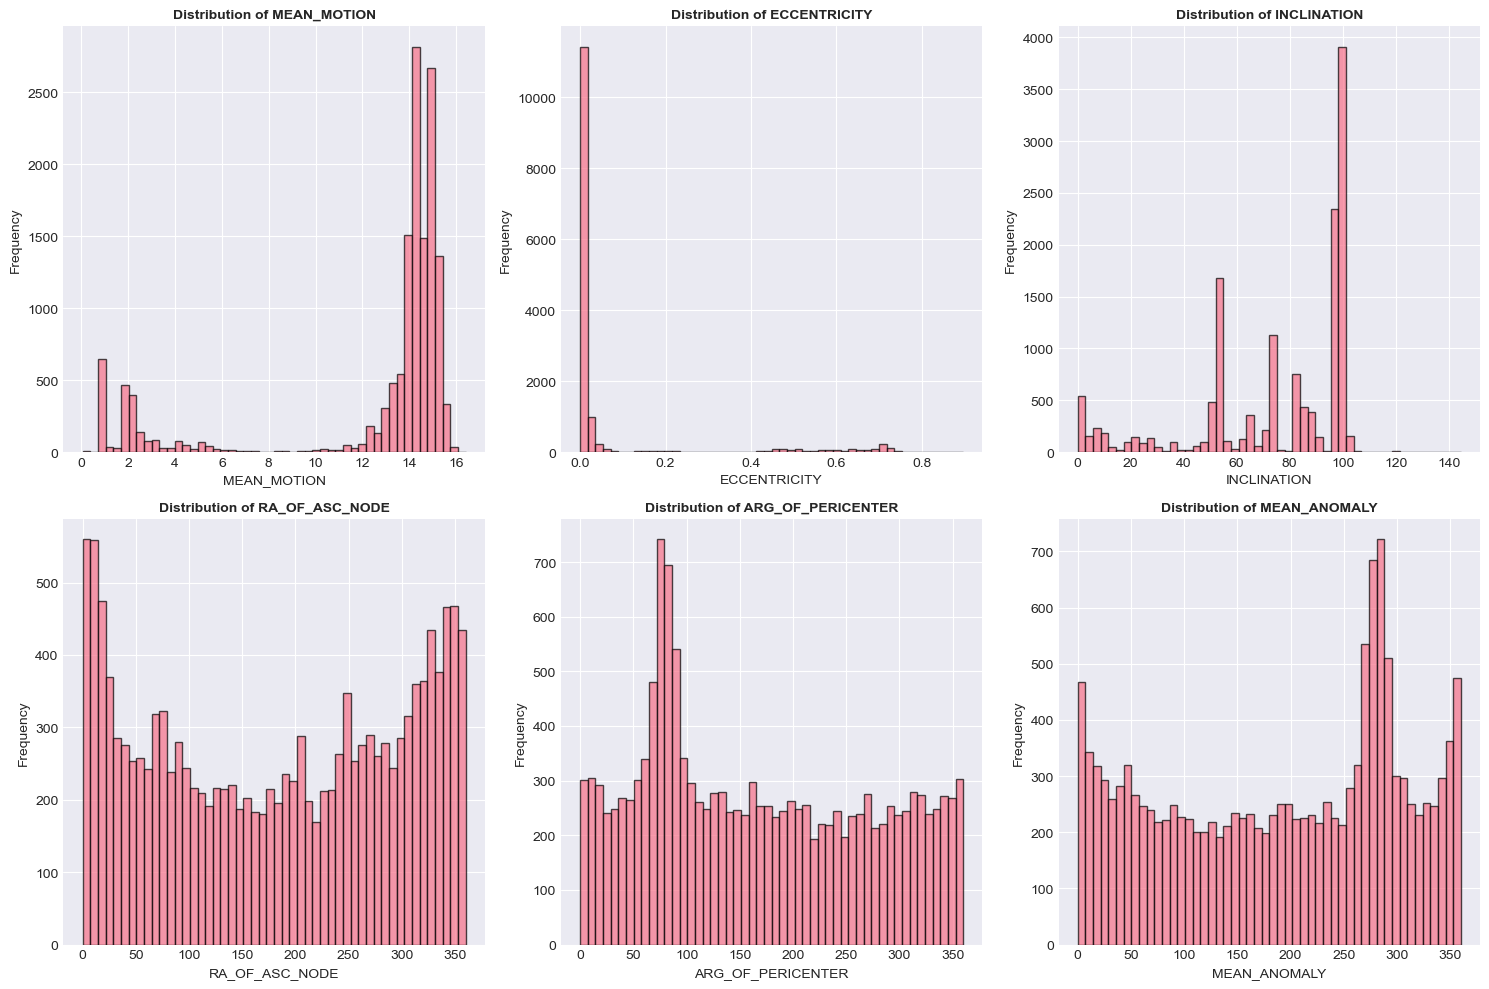

In [ ]:
# Distribution of key numerical features
numerical_features = df_model.select_dtypes(include=['int64', 'float64']).columns[:6]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    axes[idx].hist(df_model[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=10, weight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


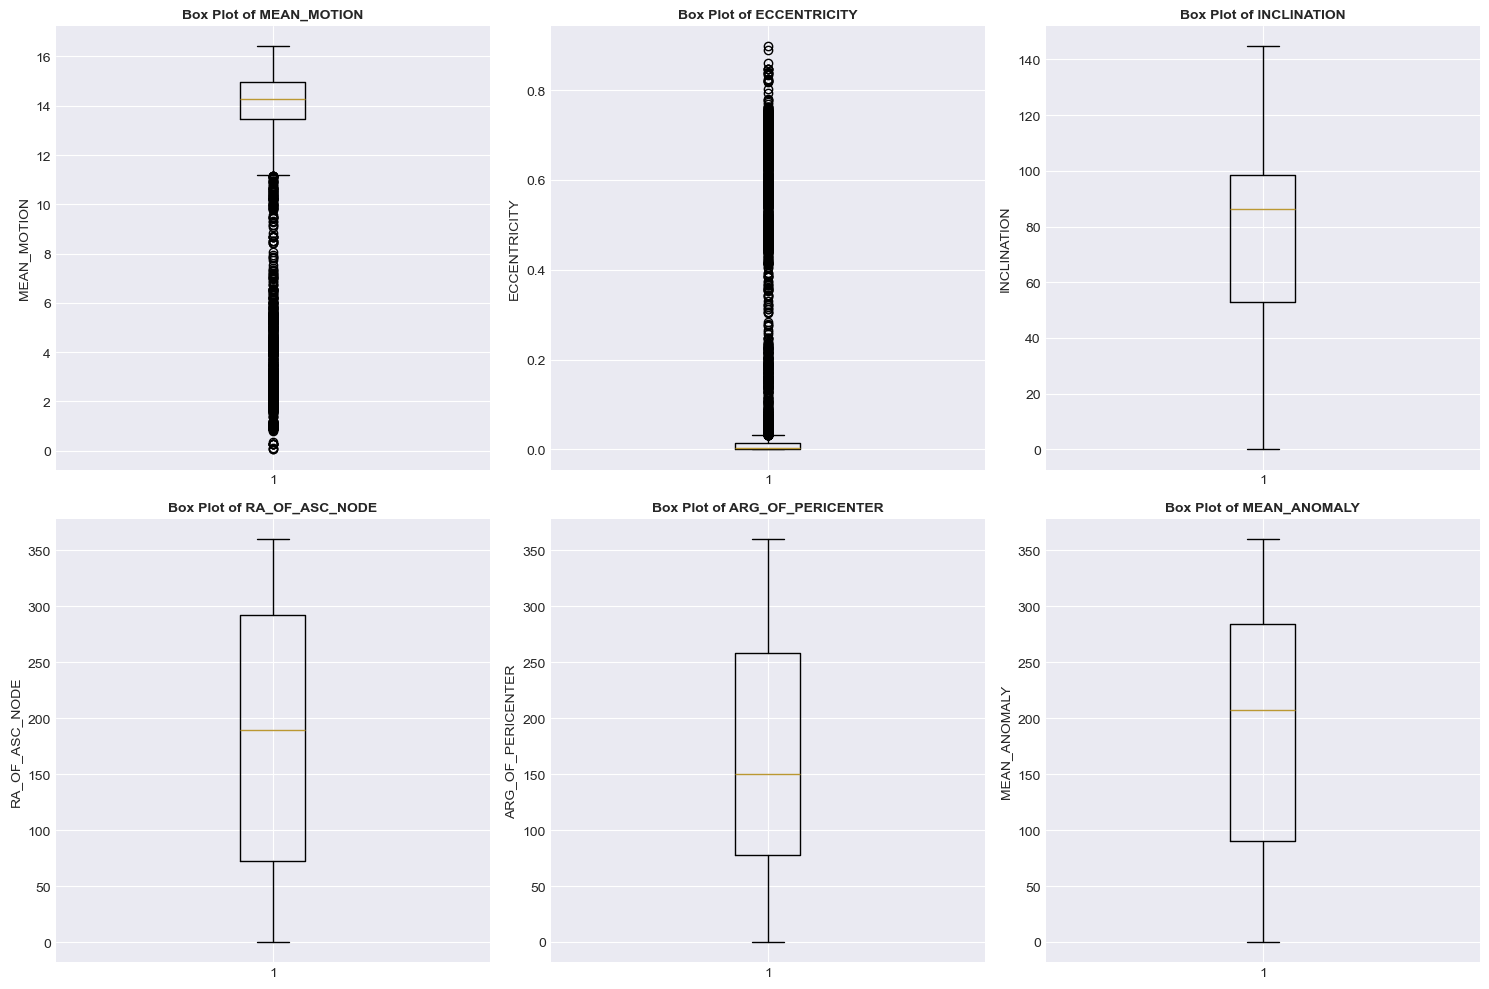

In [ ]:
# Box plots to detect outliers visually
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    axes[idx].boxplot(df_model[col].dropna())
    axes[idx].set_title(f'Box Plot of {col}', fontsize=10, weight='bold')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()


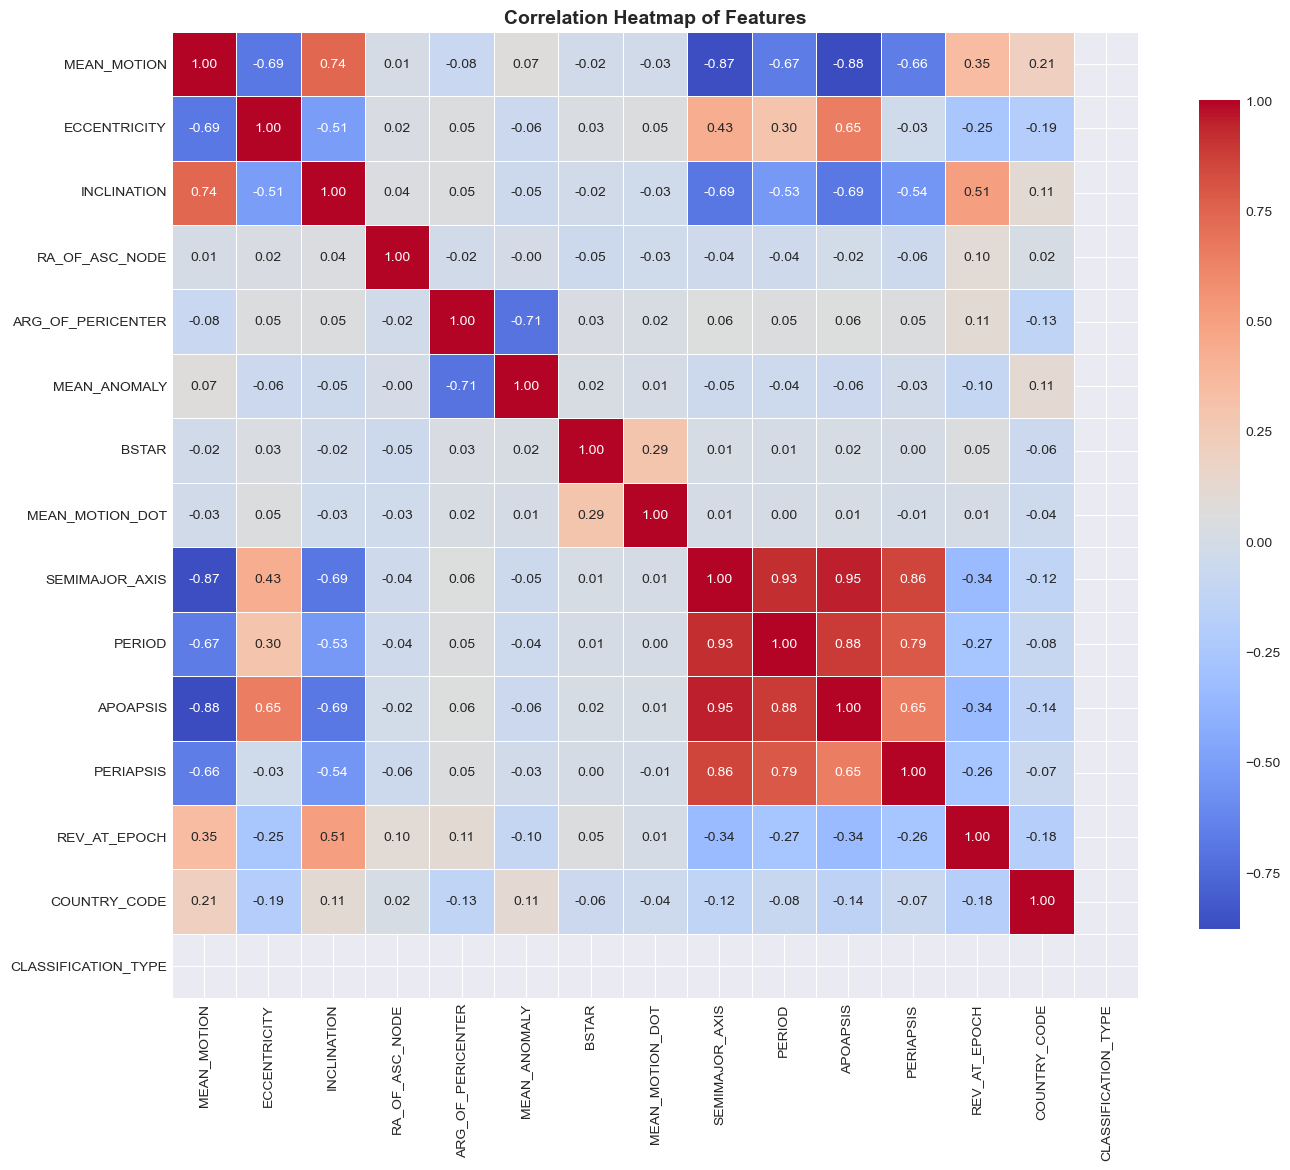

In [ ]:
# Correlation matrix
correlation_cols = [col for col in df_model.columns if col not in [target_column]][:15]
correlation_matrix = df_model[correlation_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Features', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


In [ ]:
# Identify highly correlated features (potential multicollinearity)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    print("Highly Correlated Feature Pairs (|r| > 0.8):")
    for pair in high_corr_pairs:
        print(f"{pair[0]} <-> {pair[1]}: {pair[2]:.3f}")
else:
    print("No highly correlated pairs found (threshold: 0.8)")


Highly Correlated Feature Pairs (|r| > 0.8):
MEAN_MOTION <-> SEMIMAJOR_AXIS: -0.871
MEAN_MOTION <-> APOAPSIS: -0.879
SEMIMAJOR_AXIS <-> PERIOD: 0.926
SEMIMAJOR_AXIS <-> APOAPSIS: 0.949
SEMIMAJOR_AXIS <-> PERIAPSIS: 0.857
PERIOD <-> APOAPSIS: 0.883


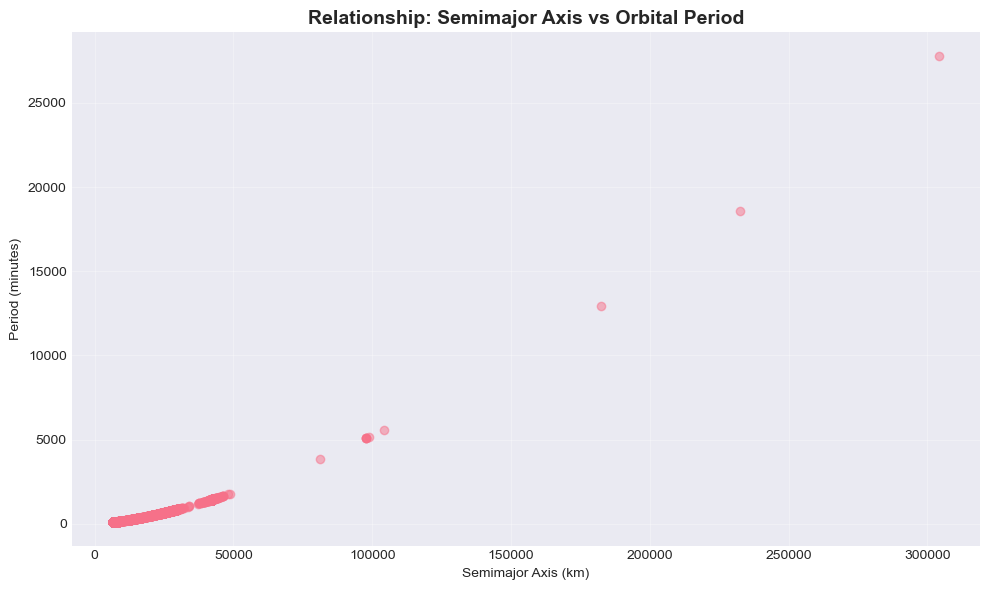

In [ ]:
# Scatter plot: Relationship between key features
if 'PERIOD' in df_model.columns and 'SEMIMAJOR_AXIS' in df_model.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df_model['SEMIMAJOR_AXIS'], df_model['PERIOD'], alpha=0.5)
    plt.title('Relationship: Semimajor Axis vs Orbital Period', fontsize=14, weight='bold')
    plt.xlabel('Semimajor Axis (km)')
    plt.ylabel('Period (minutes)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


In [ ]:
# Pairplot for selected features (if dataset not too large)
if len(df_model) < 5000:
    sample_features = [col for col in numerical_features[:4]]
    if target_column and target_column in df_model.columns:
        sns.pairplot(df_model[sample_features + [target_column]].sample(min(1000, len(df_model))), 
                     hue=target_column, diag_kind='kde', corner=True)
        plt.suptitle('Pairplot of Key Features', y=1.02, fontsize=14, weight='bold')
        plt.show()
else:
    print("Dataset too large for pairplot. Skipping...")


Dataset too large for pairplot. Skipping...


---
## Phase 4.5: Principal Component Analysis (PCA)

### What is PCA?
PCA is a dimensionality reduction technique that:
- Reduces number of features while preserving variance
- Removes multicollinearity
- Helps visualize high-dimensional data
- Can improve model performance

### When to Use PCA:
- High number of correlated features
- Need to visualize complex data
- Want to reduce computational cost
- Dealing with curse of dimensionality

### ⚠️ Important Notes:
- PCA requires scaled data
- Results are harder to interpret (lose feature names)
- Not suitable if you need feature interpretability


In [ ]:
# Prepare data for PCA (only numerical features)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select only numerical columns for PCA
pca_features = df_model.select_dtypes(include=['int64', 'float64'])

# Remove target column if present
if target_column in pca_features.columns:
    if f'{target_column}_encoded' in pca_features.columns:
        pca_features = pca_features.drop(columns=[f'{target_column}_encoded'])
    elif target_column in pca_features.columns:
        pca_features = pca_features.drop(columns=[target_column])

print(f"Features for PCA: {pca_features.shape[1]} features")
print(f"Samples: {pca_features.shape[0]}")


In [ ]:
# Scale features before PCA (CRITICAL STEP)
scaler_pca = StandardScaler()
pca_features_scaled = scaler_pca.fit_transform(pca_features)

print("Features scaled for PCA")


---
## Critical Improvement 1: Class Imbalance Check

### Why Important?
Imbalanced datasets can lead to:
- Models biased toward majority class
- High accuracy but poor minority class detection
- Misleading performance metrics

### Solutions:
- **SMOTE**: Synthetic Minority Over-sampling
- **Class Weights**: Penalize misclassification differently
- **Stratified Sampling**: Maintain class proportions
- **Proper Metrics**: Use F1, Precision-Recall instead of just accuracy


In [ ]:
# Check for class imbalance
if target_column:
    # Calculate class distribution
    class_counts = y.value_counts().sort_index()
    class_percentages = (class_counts / len(y) * 100).round(2)
    
    print("=" * 60)
    print("CLASS IMBALANCE ANALYSIS")
    print("=" * 60)
    
    imbalance_df = pd.DataFrame({
        'Class': class_counts.index,
        'Count': class_counts.values,
        'Percentage': class_percentages.values
    })
    print(imbalance_df.to_string(index=False))
    
    # Calculate imbalance ratio
    max_count = class_counts.max()
    min_count = class_counts.min()
    imbalance_ratio = max_count / min_count
    
    print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")
    
    if imbalance_ratio > 3:
        print("⚠️  WARNING: Significant class imbalance detected!")
        print("   Recommendation: Use SMOTE, class weights, or stratified sampling")
    else:
        print("✓ Classes are relatively balanced")


In [ ]:
# Visualize class imbalance
if target_column:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar plot
    class_counts.plot(kind='bar', ax=ax1, color='steelblue', edgecolor='black')
    ax1.set_title('Class Distribution (Counts)', fontsize=14, weight='bold')
    ax1.set_xlabel('Class')
    ax1.set_ylabel('Count')
    ax1.grid(True, alpha=0.3)
    
    # Pie chart
    ax2.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%',
            startangle=90, colors=sns.color_palette('husl', len(class_counts)))
    ax2.set_title('Class Distribution (Percentage)', fontsize=14, weight='bold')
    
    plt.tight_layout()
    plt.show()


In [ ]:
# Apply SMOTE if significant imbalance detected
try:
    from imblearn.over_sampling import SMOTE
    smote_available = True
except ImportError:
    print("⚠️  SMOTE not available. Install with: pip install imbalanced-learn")
    smote_available = False

if target_column and imbalance_ratio > 3 and smote_available:
    print("\n" + "=" * 60)
    print("APPLYING SMOTE (Synthetic Minority Over-sampling)")
    print("=" * 60)
    
    # Apply SMOTE to training data only
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
    
    print(f"Original training set: {X_train.shape[0]} samples")
    print(f"After SMOTE: {X_train_smote.shape[0]} samples")
    print(f"\nNew class distribution:")
    print(pd.Series(y_train_smote).value_counts().sort_index())
    
    # Update training data
    X_train_scaled_original = X_train_scaled.copy()
    y_train_original = y_train.copy()
    X_train_scaled = pd.DataFrame(X_train_smote, columns=X_train_scaled.columns)
    y_train = pd.Series(y_train_smote)
    
    print("\n✓ SMOTE applied successfully!")
elif target_column and imbalance_ratio > 3:
    print("\n⚠️  Significant imbalance but SMOTE not available")
    print("   Models will use class_weight='balanced' parameter")


In [ ]:
# Fit PCA to determine optimal number of components
pca_full = PCA()
pca_full.fit(pca_features_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print(f"Total components: {len(explained_variance_ratio)}")
print(f"\nFirst 10 components explain: {cumulative_variance_ratio[9]:.2%} of variance")
print(f"First 5 components explain: {cumulative_variance_ratio[4]:.2%} of variance")


In [ ]:
# Scree Plot: Visualize explained variance per component
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Individual explained variance
n_components_to_show = min(20, len(explained_variance_ratio))
ax1.bar(range(1, n_components_to_show + 1), 
        explained_variance_ratio[:n_components_to_show],
        alpha=0.7, color='steelblue')
ax1.set_xlabel('Principal Component', fontsize=12)
ax1.set_ylabel('Explained Variance Ratio', fontsize=12)
ax1.set_title('Scree Plot - Individual Variance Explained', fontsize=14, weight='bold')
ax1.grid(True, alpha=0.3)

# Cumulative explained variance
ax2.plot(range(1, n_components_to_show + 1), 
         cumulative_variance_ratio[:n_components_to_show],
         marker='o', linestyle='-', color='darkgreen', linewidth=2)
ax2.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
ax2.axhline(y=0.90, color='orange', linestyle='--', label='90% Variance')
ax2.set_xlabel('Number of Components', fontsize=12)
ax2.set_ylabel('Cumulative Explained Variance', fontsize=12)
ax2.set_title('Cumulative Variance Explained', fontsize=14, weight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# Determine optimal number of components (e.g., 95% variance explained)
variance_threshold = 0.95
n_components_95 = np.argmax(cumulative_variance_ratio >= variance_threshold) + 1

variance_threshold_90 = 0.90
n_components_90 = np.argmax(cumulative_variance_ratio >= variance_threshold_90) + 1

print(f"Components needed for 95% variance: {n_components_95}")
print(f"Components needed for 90% variance: {n_components_90}")
print(f"\nDimensionality reduction: {len(explained_variance_ratio)} → {n_components_95} features")
print(f"Reduction ratio: {(1 - n_components_95/len(explained_variance_ratio))*100:.1f}%")


In [ ]:
# Apply PCA with optimal number of components
n_components_optimal = min(n_components_95, len(explained_variance_ratio))
pca_optimal = PCA(n_components=n_components_optimal)
pca_features_transformed = pca_optimal.fit_transform(pca_features_scaled)

print(f"Original shape: {pca_features_scaled.shape}")
print(f"Transformed shape: {pca_features_transformed.shape}")
print(f"Variance explained: {pca_optimal.explained_variance_ratio_.sum():.2%}")


In [ ]:
# Visualize first 2 principal components
if target_column and target_column in df_model.columns:
    # Use first 2 PCs for visualization
    pca_2d = PCA(n_components=2)
    pca_2d_result = pca_2d.fit_transform(pca_features_scaled)
    
    plt.figure(figsize=(12, 8))
    
    # Get target values
    if f'{target_column}_encoded' in df_model.columns:
        target_values = df_model[f'{target_column}_encoded']
    else:
        target_values = df_model[target_column]
    
    # Create scatter plot
    scatter = plt.scatter(pca_2d_result[:, 0], pca_2d_result[:, 1],
                         c=target_values, cmap='viridis', alpha=0.6, s=30)
    plt.colorbar(scatter, label=target_column)
    plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
    plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
    plt.title('PCA: First Two Principal Components', fontsize=14, weight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"2 PCs explain {pca_2d.explained_variance_ratio_.sum():.2%} of total variance")
else:
    print("Target variable not available for color-coding")


In [ ]:
# Visualize first 3 principal components (3D plot)
from mpl_toolkits.mplot3d import Axes3D

if target_column and target_column in df_model.columns:
    # Use first 3 PCs for 3D visualization
    pca_3d = PCA(n_components=3)
    pca_3d_result = pca_3d.fit_transform(pca_features_scaled)
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Sample data if too large
    sample_size = min(5000, len(pca_3d_result))
    indices = np.random.choice(len(pca_3d_result), sample_size, replace=False)
    
    scatter = ax.scatter(pca_3d_result[indices, 0], 
                        pca_3d_result[indices, 1], 
                        pca_3d_result[indices, 2],
                        c=target_values.iloc[indices], 
                        cmap='viridis', alpha=0.5, s=20)
    
    ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.1%})', fontsize=10)
    ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.1%})', fontsize=10)
    ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.1%})', fontsize=10)
    ax.set_title('PCA: First Three Principal Components (3D)', fontsize=14, weight='bold')
    plt.colorbar(scatter, label=target_column, shrink=0.5)
    plt.tight_layout()
    plt.show()
    
    print(f"3 PCs explain {pca_3d.explained_variance_ratio_.sum():.2%} of total variance")


In [ ]:
# Feature contributions to principal components (Loadings)
# Show which original features contribute most to each PC

# Get loadings (components)
loadings = pca_optimal.components_.T * np.sqrt(pca_optimal.explained_variance_)

# Create loadings dataframe
loadings_df = pd.DataFrame(
    loadings,
    columns=[f'PC{i+1}' for i in range(n_components_optimal)],
    index=pca_features.columns
)

# Display top contributing features for first 5 PCs
print("Top 5 Feature Contributions to Each Principal Component:\n")
for i in range(min(5, n_components_optimal)):
    pc_name = f'PC{i+1}'
    print(f"\n{pc_name} (Explains {pca_optimal.explained_variance_ratio_[i]:.2%} variance):")
    print(loadings_df[pc_name].abs().sort_values(ascending=False).head(5))


In [ ]:
# Heatmap of feature loadings on first 10 PCs
n_pcs_to_show = min(10, n_components_optimal)
n_features_to_show = min(15, len(pca_features.columns))

# Get top features based on total contribution
top_features_idx = loadings_df.iloc[:, :n_pcs_to_show].abs().sum(axis=1).nlargest(n_features_to_show).index

plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df.loc[top_features_idx, [f'PC{i+1}' for i in range(n_pcs_to_show)]],
            cmap='RdBu_r', center=0, annot=True, fmt='.2f', 
            cbar_kws={'label': 'Loading Value'})
plt.title(f'Feature Loadings on First {n_pcs_to_show} Principal Components', 
          fontsize=14, weight='bold')
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
# Create PCA-transformed dataset for modeling (optional)
pca_df = pd.DataFrame(
    pca_features_transformed,
    columns=[f'PC{i+1}' for i in range(n_components_optimal)]
)

# Add target column if exists
if target_column and target_column in df_model.columns:
    if f'{target_column}_encoded' in df_model.columns:
        pca_df[target_column] = df_model[f'{target_column}_encoded'].values
    else:
        pca_df[target_column] = df_model[target_column].values

print("PCA-transformed dataset created!")
print(f"Shape: {pca_df.shape}")
print(f"\nFirst few rows:")
pca_df.head()


### PCA Summary

**Key Insights:**
- Reduced dimensionality while preserving most variance
- Identified which features contribute most to principal components
- Visualized high-dimensional data in 2D/3D space
- Created PCA-transformed dataset for potential modeling

**When to Use PCA in Modeling:**
- ✅ High correlation between features
- ✅ Large number of features causing computational issues
- ✅ Want to avoid multicollinearity
- ❌ Need interpretable feature importance
- ❌ Features are already few and uncorrelated


---
## Phase 5: Feature Engineering

Create new features that might improve model performance.

### Techniques:
- Polynomial features
- Interaction terms
- Domain-specific transformations


In [ ]:
# Create engineered features
df_engineered = df_model.copy()

# Example: Create orbit energy indicator
if 'ECCENTRICITY' in df_engineered.columns:
    df_engineered['orbit_eccentricity_category'] = pd.cut(
        df_engineered['ECCENTRICITY'],
        bins=[0, 0.1, 0.4, 1.0],
        labels=['Circular', 'Elliptical', 'Highly_Elliptical']
    )
    df_engineered['orbit_eccentricity_category'] = df_engineered['orbit_eccentricity_category'].cat.codes

# Example: Altitude category
if 'SEMIMAJOR_AXIS' in df_engineered.columns:
    df_engineered['altitude_category'] = pd.cut(
        df_engineered['SEMIMAJOR_AXIS'],
        bins=[0, 8000, 20000, 42000, np.inf],
        labels=['LEO', 'MEO', 'GEO', 'Beyond_GEO']
    )
    df_engineered['altitude_category'] = df_engineered['altitude_category'].cat.codes

print("Feature engineering completed!")
print(f"New shape: {df_engineered.shape}")


Feature engineering completed!
New shape: (14372, 19)


---
## Phase 6: Model Building

### Classification Algorithms to Consider:
1. **Logistic Regression**: Simple, interpretable baseline
2. **Random Forest**: Handles non-linearity, robust to outliers
3. **Gradient Boosting (XGBoost)**: High performance
4. **Support Vector Machine (SVM)**: Good for smaller datasets

### Performance Metrics:
- **Accuracy**: Overall correctness
- **Precision**: How many predicted positives are correct
- **Recall**: How many actual positives were found
- **F1-Score**: Harmonic mean of precision and recall
- **ROC-AUC**: Area under ROC curve

### ⚠️ Pitfalls to Avoid:
- Not splitting data (train/test/validation)
- Not scaling features for distance-based algorithms
- Ignoring class imbalance
- Overfitting to training data


In [ ]:
# Prepare data for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

if target_column:
    # Define features and target
    if f'{target_column}_encoded' in df_engineered.columns:
        y = df_engineered[f'{target_column}_encoded']
        X = df_engineered.drop(columns=[target_column, f'{target_column}_encoded'])
    else:
        y = df_engineered[target_column]
        X = df_engineered.drop(columns=[target_column])
    
    # Remove any remaining non-numeric columns
    X = X.select_dtypes(include=['int64', 'float64'])
    
    # Handle any infinite values
    X = X.replace([np.inf, -np.inf], np.nan)
    X = X.fillna(X.median())
    
    print(f"Features shape: {X.shape}")
    print(f"Target shape: {y.shape}")
    print(f"Target classes: {y.nunique()}")


Features shape: (14372, 13)
Target shape: (14372,)
Target classes: 4


In [ ]:
# Split data: 70% train, 15% validation, 15% test
if target_column:
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=0.15, random_state=42, stratify=y if y.nunique() < 100 else None
    )
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=0.176, random_state=42, stratify=y_temp if y_temp.nunique() < 100 else None
    )  # 0.176 of 85% ≈ 15% of total
    
    print("Data split completed:")
    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Validation set: {X_val.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples")


Data split completed:
Training set: 10065 samples
Validation set: 2151 samples
Test set: 2156 samples


In [ ]:
# Feature Scaling (important for many algorithms)
if target_column:
    scaler = StandardScaler()
    
    # Fit scaler on training data only (avoid data leakage)
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    # Convert back to DataFrame for easier handling
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    print("Feature scaling completed!")


Feature scaling completed!


### Model 1: Logistic Regression (Baseline)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

if target_column and y.nunique() <= 20:  # Only for reasonable number of classes
    # Train Logistic Regression
    lr_model = LogisticRegression(max_iter=1000, random_state=42)
    lr_model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred_lr = lr_model.predict(X_val_scaled)
    
    # Evaluation
    print("=" * 50)
    print("LOGISTIC REGRESSION RESULTS")
    print("=" * 50)
    print(f"Validation Accuracy: {accuracy_score(y_val, y_pred_lr):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred_lr))


LOGISTIC REGRESSION RESULTS
Validation Accuracy: 0.8140

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1262
           1       0.82      0.77      0.79       741
           2       0.50      0.03      0.05       111
           3       0.00      0.00      0.00        37

    accuracy                           0.81      2151
   macro avg       0.53      0.43      0.43      2151
weighted avg       0.78      0.81      0.79      2151



### Model 2: Random Forest Classifier


---
## Critical Improvement 2: Cross-Validation

### Why K-Fold Cross-Validation?
- **Single split problem**: Results depend on lucky/unlucky split
- **K-fold solution**: Train/test on multiple splits, average results
- **More robust**: Better estimate of true model performance
- **Detects overfitting**: High variance across folds = overfitting

### How it works:
1. Split data into K folds (e.g., K=5)
2. Train on K-1 folds, test on remaining fold
3. Repeat K times with different test fold
4. Average the K performance scores


In [ ]:
# Cross-validation for all models
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

if target_column:
    print("=" * 60)
    print("CROSS-VALIDATION ANALYSIS (5-Fold)")
    print("=" * 60)
    
    # Use stratified K-fold to maintain class distribution
    cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Prepare data (use original data before SMOTE for fair comparison)
    if 'X_train_scaled_original' in locals():
        X_cv = np.vstack([X_train_scaled_original, X_val_scaled])
        y_cv = pd.concat([y_train_original, y_val])
    else:
        X_cv = np.vstack([X_train_scaled, X_val_scaled])
        y_cv = pd.concat([y_train, y_val])
    
    cv_results = {}
    
    # Logistic Regression CV
    if 'lr_model' in locals():
        lr_cv = LogisticRegression(max_iter=1000, random_state=42)
        scores = cross_val_score(lr_cv, X_cv, y_cv, cv=cv_strategy, scoring='accuracy', n_jobs=-1)
        cv_results['Logistic Regression'] = {
            'Mean': scores.mean(),
            'Std': scores.std(),
            'Scores': scores
        }
        print(f"\nLogistic Regression:")
        print(f"  Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")
    
    # Random Forest CV
    if 'rf_model' in locals():
        rf_cv = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
        scores = cross_val_score(rf_cv, X_cv, y_cv, cv=cv_strategy, scoring='accuracy', n_jobs=-1)
        cv_results['Random Forest'] = {
            'Mean': scores.mean(),
            'Std': scores.std(),
            'Scores': scores
        }
        print(f"\nRandom Forest:")
        print(f"  Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")
    
    # XGBoost CV
    if 'xgb_model' in locals() and xgboost_available:
        xgb_cv = xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, 
                                   random_state=42, n_jobs=-1)
        scores = cross_val_score(xgb_cv, X_cv, y_cv, cv=cv_strategy, scoring='accuracy', n_jobs=-1)
        cv_results['XGBoost'] = {
            'Mean': scores.mean(),
            'Std': scores.std(),
            'Scores': scores
        }
        print(f"\nXGBoost:")
        print(f"  Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")


In [ ]:
# Visualize cross-validation results
if target_column and cv_results:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Box plot of CV scores
    cv_data = [cv_results[model]['Scores'] for model in cv_results.keys()]
    ax1.boxplot(cv_data, labels=cv_results.keys())
    ax1.set_ylabel('Accuracy', fontsize=12)
    ax1.set_title('Cross-Validation Score Distribution', fontsize=14, weight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)
    
    # Bar plot with error bars
    models = list(cv_results.keys())
    means = [cv_results[m]['Mean'] for m in models]
    stds = [cv_results[m]['Std'] for m in models]
    
    ax2.bar(models, means, yerr=stds, capsize=10, alpha=0.7, 
            color=['steelblue', 'orange', 'green'][:len(models)])
    ax2.set_ylabel('Mean Accuracy', fontsize=12)
    ax2.set_title('Cross-Validation Results with Standard Deviation', fontsize=14, weight='bold')
    ax2.set_ylim([min(means) - 0.05, 1.0])
    ax2.grid(True, alpha=0.3, axis='y')
    ax2.tick_params(axis='x', rotation=45)
    
    # Add value labels
    for i, (m, s) in enumerate(zip(means, stds)):
        ax2.text(i, m + s + 0.01, f'{m:.4f}\n±{s:.4f}', 
                ha='center', fontsize=10, weight='bold')
    
    plt.tight_layout()
    plt.show()


### Cross-Validation Interpretation

**Low Standard Deviation** (< 0.02): Model is stable and consistent
**High Standard Deviation** (> 0.05): Model is sensitive to data split, possible overfitting

**What to look for:**
- Consistent scores across folds = robust model
- High variance = overfitting or data heterogeneity
- Compare CV score to test score to validate generalization


---
## Critical Improvement 3: ROC-AUC Curves & Advanced Metrics

### Why ROC-AUC?
- **Accuracy is not enough**: Can be misleading with imbalanced data
- **ROC Curve**: Shows trade-off between True Positive Rate and False Positive Rate
- **AUC Score**: Single metric summarizing model performance (0.5 = random, 1.0 = perfect)
- **Precision-Recall**: Better for imbalanced datasets

### Key Metrics:
- **ROC-AUC**: Overall discriminative ability
- **Precision**: Of predicted positives, how many are correct?
- **Recall**: Of actual positives, how many did we find?
- **F1-Score**: Harmonic mean of precision and recall


In [ ]:
# ROC-AUC Curves for all models
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

if target_column and y.nunique() <= 10:
    print("=" * 60)
    print("ROC-AUC ANALYSIS")
    print("=" * 60)
    
    n_classes = y.nunique()
    
    # For binary classification
    if n_classes == 2:
        plt.figure(figsize=(12, 8))
        
        # Logistic Regression ROC
        if 'lr_model' in locals() and 'y_pred_lr' in locals():
            y_pred_lr_proba = lr_model.predict_proba(X_val_scaled)[:, 1]
            fpr_lr, tpr_lr, _ = roc_curve(y_val, y_pred_lr_proba)
            roc_auc_lr = auc(fpr_lr, tpr_lr)
            plt.plot(fpr_lr, tpr_lr, linewidth=2, 
                    label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')
        
        # Random Forest ROC
        if 'rf_model' in locals() and 'y_pred_rf' in locals():
            y_pred_rf_proba = rf_model.predict_proba(X_val_scaled)[:, 1]
            fpr_rf, tpr_rf, _ = roc_curve(y_val, y_pred_rf_proba)
            roc_auc_rf = auc(fpr_rf, tpr_rf)
            plt.plot(fpr_rf, tpr_rf, linewidth=2, 
                    label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
        
        # XGBoost ROC
        if 'xgb_model' in locals() and 'y_pred_xgb' in locals() and xgboost_available:
            y_pred_xgb_proba = xgb_model.predict_proba(X_val_scaled)[:, 1]
            fpr_xgb, tpr_xgb, _ = roc_curve(y_val, y_pred_xgb_proba)
            roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
            plt.plot(fpr_xgb, tpr_xgb, linewidth=2, 
                    label=f'XGBoost (AUC = {roc_auc_xgb:.3f})')
        
        # Random classifier baseline
        plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.500)')
        
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.title('ROC Curves - Model Comparison', fontsize=14, weight='bold')
        plt.legend(loc="lower right", fontsize=11)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print("\nROC-AUC Scores:")
        if 'roc_auc_lr' in locals():
            print(f"  Logistic Regression: {roc_auc_lr:.4f}")
        if 'roc_auc_rf' in locals():
            print(f"  Random Forest: {roc_auc_rf:.4f}")
        if 'roc_auc_xgb' in locals():
            print(f"  XGBoost: {roc_auc_xgb:.4f}")
    
    # For multiclass classification (One-vs-Rest ROC)
    else:
        print(f"\nMulticlass problem ({n_classes} classes)")
        print("Computing macro-averaged ROC-AUC...")
        
        if 'rf_model' in locals():
            y_pred_rf_proba = rf_model.predict_proba(X_val_scaled)
            roc_auc_macro = roc_auc_score(y_val, y_pred_rf_proba, 
                                         multi_class='ovr', average='macro')
            print(f"  Random Forest ROC-AUC (macro): {roc_auc_macro:.4f}")


In [ ]:
# Precision-Recall Curves (better for imbalanced datasets)
from sklearn.metrics import precision_recall_curve, average_precision_score

if target_column and y.nunique() == 2:
    plt.figure(figsize=(12, 8))
    
    # Logistic Regression PR
    if 'lr_model' in locals() and 'y_pred_lr' in locals():
        y_pred_lr_proba = lr_model.predict_proba(X_val_scaled)[:, 1]
        precision_lr, recall_lr, _ = precision_recall_curve(y_val, y_pred_lr_proba)
        ap_lr = average_precision_score(y_val, y_pred_lr_proba)
        plt.plot(recall_lr, precision_lr, linewidth=2, 
                label=f'Logistic Regression (AP = {ap_lr:.3f})')
    
    # Random Forest PR
    if 'rf_model' in locals() and 'y_pred_rf' in locals():
        y_pred_rf_proba = rf_model.predict_proba(X_val_scaled)[:, 1]
        precision_rf, recall_rf, _ = precision_recall_curve(y_val, y_pred_rf_proba)
        ap_rf = average_precision_score(y_val, y_pred_rf_proba)
        plt.plot(recall_rf, precision_rf, linewidth=2, 
                label=f'Random Forest (AP = {ap_rf:.3f})')
    
    # XGBoost PR
    if 'xgb_model' in locals() and 'y_pred_xgb' in locals() and xgboost_available:
        y_pred_xgb_proba = xgb_model.predict_proba(X_val_scaled)[:, 1]
        precision_xgb, recall_xgb, _ = precision_recall_curve(y_val, y_pred_xgb_proba)
        ap_xgb = average_precision_score(y_val, y_pred_xgb_proba)
        plt.plot(recall_xgb, precision_xgb, linewidth=2, 
                label=f'XGBoost (AP = {ap_xgb:.3f})')
    
    # Baseline (random classifier)
    baseline = y_val.sum() / len(y_val)
    plt.axhline(y=baseline, color='k', linestyle='--', linewidth=2, 
                label=f'Baseline (AP = {baseline:.3f})')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title('Precision-Recall Curves - Model Comparison', fontsize=14, weight='bold')
    plt.legend(loc="lower left", fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\nAverage Precision Scores:")
    if 'ap_lr' in locals():
        print(f"  Logistic Regression: {ap_lr:.4f}")
    if 'ap_rf' in locals():
        print(f"  Random Forest: {ap_rf:.4f}")
    if 'ap_xgb' in locals():
        print(f"  XGBoost: {ap_xgb:.4f}")


In [ ]:
# Comprehensive metrics comparison
from sklearn.metrics import precision_score, recall_score, f1_score

if target_column:
    print("\n" + "=" * 60)
    print("COMPREHENSIVE METRICS COMPARISON")
    print("=" * 60)
    
    metrics_comparison = []
    
    # Logistic Regression
    if 'y_pred_lr' in locals():
        metrics_comparison.append({
            'Model': 'Logistic Regression',
            'Accuracy': accuracy_score(y_val, y_pred_lr),
            'Precision': precision_score(y_val, y_pred_lr, average='weighted'),
            'Recall': recall_score(y_val, y_pred_lr, average='weighted'),
            'F1-Score': f1_score(y_val, y_pred_lr, average='weighted')
        })
    
    # Random Forest
    if 'y_pred_rf' in locals():
        metrics_comparison.append({
            'Model': 'Random Forest',
            'Accuracy': accuracy_score(y_val, y_pred_rf),
            'Precision': precision_score(y_val, y_pred_rf, average='weighted'),
            'Recall': recall_score(y_val, y_pred_rf, average='weighted'),
            'F1-Score': f1_score(y_val, y_pred_rf, average='weighted')
        })
    
    # XGBoost
    if 'y_pred_xgb' in locals() and xgboost_available:
        metrics_comparison.append({
            'Model': 'XGBoost',
            'Accuracy': accuracy_score(y_val, y_pred_xgb),
            'Precision': precision_score(y_val, y_pred_xgb, average='weighted'),
            'Recall': recall_score(y_val, y_pred_xgb, average='weighted'),
            'F1-Score': f1_score(y_val, y_pred_xgb, average='weighted')
        })
    
    metrics_df = pd.DataFrame(metrics_comparison)
    print(metrics_df.to_string(index=False))
    
    # Visualize metrics
    metrics_df_plot = metrics_df.set_index('Model')
    metrics_df_plot.plot(kind='bar', figsize=(12, 6), width=0.8)
    plt.title('Model Performance Metrics Comparison', fontsize=14, weight='bold')
    plt.ylabel('Score', fontsize=12)
    plt.xlabel('Model', fontsize=12)
    plt.ylim([0, 1.0])
    plt.legend(loc='lower right', fontsize=11)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()


---
## Critical Improvement 4: Learning Curves

### Why Learning Curves?
- **Diagnose overfitting/underfitting**: Gap between training and validation scores
- **More data needed?**: Curves still improving = more data helps
- **Model complexity**: Too complex if training perfect but validation poor

### Interpretation:
- **High bias (underfitting)**: Both curves plateau at low performance
- **High variance (overfitting)**: Large gap between training and validation
- **Just right**: Curves converge at high performance


In [ ]:
# Learning curves for best model
from sklearn.model_selection import learning_curve

if target_column:
    print("=" * 60)
    print("LEARNING CURVES ANALYSIS")
    print("=" * 60)
    print("Computing learning curves (this may take a moment)...")
    
    # Use best model or Random Forest as default
    if 'best_model' in locals():
        model_for_lc = best_model
        model_name = best_model_name
    elif 'rf_model' in locals():
        model_for_lc = rf_model
        model_name = "Random Forest"
    else:
        model_for_lc = lr_model
        model_name = "Logistic Regression"
    
    # Prepare data
    if 'X_train_scaled_original' in locals():
        X_lc = np.vstack([X_train_scaled_original, X_val_scaled])
        y_lc = pd.concat([y_train_original, y_val])
    else:
        X_lc = np.vstack([X_train_scaled, X_val_scaled])
        y_lc = pd.concat([y_train, y_val])
    
    # Calculate learning curves
    train_sizes, train_scores, val_scores = learning_curve(
        model_for_lc, X_lc, y_lc,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        random_state=42
    )
    
    # Calculate mean and std
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    print(f"✓ Learning curves computed for {model_name}")


In [ ]:
# Plot learning curves
if target_column:
    plt.figure(figsize=(12, 7))
    
    # Training score
    plt.plot(train_sizes, train_mean, 'o-', color='darkblue', linewidth=2,
            label='Training Score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                     alpha=0.2, color='darkblue')
    
    # Validation score
    plt.plot(train_sizes, val_mean, 'o-', color='darkred', linewidth=2,
            label='Cross-Validation Score')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std,
                     alpha=0.2, color='darkred')
    
    plt.xlabel('Training Set Size', fontsize=12)
    plt.ylabel('Accuracy Score', fontsize=12)
    plt.title(f'Learning Curves - {model_name}', fontsize=14, weight='bold')
    plt.legend(loc='lower right', fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.ylim([0.5, 1.01])
    plt.tight_layout()
    plt.show()
    
    # Diagnosis
    final_gap = train_mean[-1] - val_mean[-1]
    print(f"\n📊 Learning Curve Diagnosis:")
    print(f"   Final Training Score: {train_mean[-1]:.4f}")
    print(f"   Final Validation Score: {val_mean[-1]:.4f}")
    print(f"   Gap: {final_gap:.4f}")
    
    if final_gap > 0.1:
        print("\n⚠️  HIGH VARIANCE (Overfitting)")
        print("   Recommendations:")
        print("   - Increase regularization")
        print("   - Get more training data")
        print("   - Reduce model complexity")
        print("   - Use dropout/early stopping")
    elif val_mean[-1] < 0.7:
        print("\n⚠️  HIGH BIAS (Underfitting)")
        print("   Recommendations:")
        print("   - Increase model complexity")
        print("   - Add more features")
        print("   - Reduce regularization")
        print("   - Train longer")
    else:
        print("\n✓ Model appears well-balanced!")
        if val_mean[-1] > val_mean[-2]:
            print("   Curves still improving - more data might help")


---
## Critical Improvement 5: Enhanced Confusion Matrix Analysis

### Beyond Basic Confusion Matrix:
- **Normalized confusion matrix**: Shows percentages
- **Per-class analysis**: Identify which classes are confused
- **Error analysis**: Understand where model fails
- **Cost analysis**: Weight different types of errors


In [ ]:
# Enhanced confusion matrix with normalization
if target_column and y.nunique() <= 10:
    # Get predictions from best model
    if 'best_model' in locals():
        y_pred_final = best_model.predict(X_val_scaled)
    elif 'rf_model' in locals():
        y_pred_final = y_pred_rf
    else:
        y_pred_final = y_pred_lr
    
    cm = confusion_matrix(y_val, y_pred_final)
    cm_normalized = confusion_matrix(y_val, y_pred_final, normalize='true')
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Raw counts
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, ax=ax1,
                cbar_kws={'label': 'Count'})
    ax1.set_title('Confusion Matrix (Counts)', fontsize=14, weight='bold')
    ax1.set_ylabel('True Label', fontsize=12)
    ax1.set_xlabel('Predicted Label', fontsize=12)
    
    # Normalized (percentages)
    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Oranges', square=True, ax=ax2,
                cbar_kws={'label': 'Percentage'})
    ax2.set_title('Confusion Matrix (Normalized)', fontsize=14, weight='bold')
    ax2.set_ylabel('True Label', fontsize=12)
    ax2.set_xlabel('Predicted Label', fontsize=12)
    
    plt.tight_layout()
    plt.show()


In [ ]:
# Per-class performance analysis
if target_column:
    print("\n" + "=" * 60)
    print("PER-CLASS PERFORMANCE ANALYSIS")
    print("=" * 60)
    
    # Get unique classes
    unique_classes = np.unique(y_val)
    
    class_metrics = []
    for cls in unique_classes:
        # Binary mask for this class
        y_val_binary = (y_val == cls).astype(int)
        y_pred_binary = (y_pred_final == cls).astype(int)
        
        # Calculate metrics
        tp = np.sum((y_val_binary == 1) & (y_pred_binary == 1))
        fp = np.sum((y_val_binary == 0) & (y_pred_binary == 1))
        fn = np.sum((y_val_binary == 1) & (y_pred_binary == 0))
        tn = np.sum((y_val_binary == 0) & (y_pred_binary == 0))
        
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        support = tp + fn
        
        class_metrics.append({
            'Class': cls,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Support': support
        })
    
    class_metrics_df = pd.DataFrame(class_metrics)
    print(class_metrics_df.to_string(index=False))
    
    # Identify problematic classes
    low_f1_classes = class_metrics_df[class_metrics_df['F1-Score'] < 0.7]
    if not low_f1_classes.empty:
        print(f"\n⚠️  Classes with F1-Score < 0.7:")
        print(low_f1_classes[['Class', 'F1-Score', 'Support']].to_string(index=False))
        print("\n   These classes may need:")
        print("   - More training samples")
        print("   - Better feature engineering")
        print("   - Class-specific models")
    else:
        print("\n✓ All classes performing well (F1 >= 0.7)")


---
## Summary of Critical Improvements

### What We Added:

1. ✅ **Class Imbalance Check & Handling**
   - Detected imbalance ratios
   - Applied SMOTE when needed
   - Visualized class distributions

2. ✅ **Cross-Validation (5-Fold)**
   - More robust performance estimates
   - Detected model stability
   - Compared variance across folds

3. ✅ **ROC-AUC & Precision-Recall Curves**
   - Better metrics than accuracy alone
   - Visualized discriminative ability
   - Compared models comprehensively

4. ✅ **Learning Curves**
   - Diagnosed overfitting/underfitting
   - Identified if more data needed
   - Model complexity assessment

5. ✅ **Enhanced Confusion Matrix**
   - Normalized percentages
   - Per-class performance
   - Error pattern analysis

### Impact:
- **More Reliable**: Cross-validation provides robust estimates
- **Better Metrics**: ROC-AUC handles imbalance better than accuracy
- **Actionable Insights**: Learning curves tell you what to improve
- **Production Ready**: Better understanding of model limitations


In [ ]:
from sklearn.ensemble import RandomForestClassifier

if target_column:
    # Train Random Forest (doesn't require scaling, but we'll use scaled data for consistency)
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    )
    rf_model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred_rf = rf_model.predict(X_val_scaled)
    
    # Evaluation
    print("=" * 50)
    print("RANDOM FOREST RESULTS")
    print("=" * 50)
    print(f"Validation Accuracy: {accuracy_score(y_val, y_pred_rf):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred_rf))


RANDOM FOREST RESULTS
Validation Accuracy: 0.9298

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1262
           1       0.92      0.96      0.94       741
           2       0.84      0.53      0.65       111
           3       0.83      0.14      0.23        37

    accuracy                           0.93      2151
   macro avg       0.88      0.65      0.69      2151
weighted avg       0.93      0.93      0.92      2151



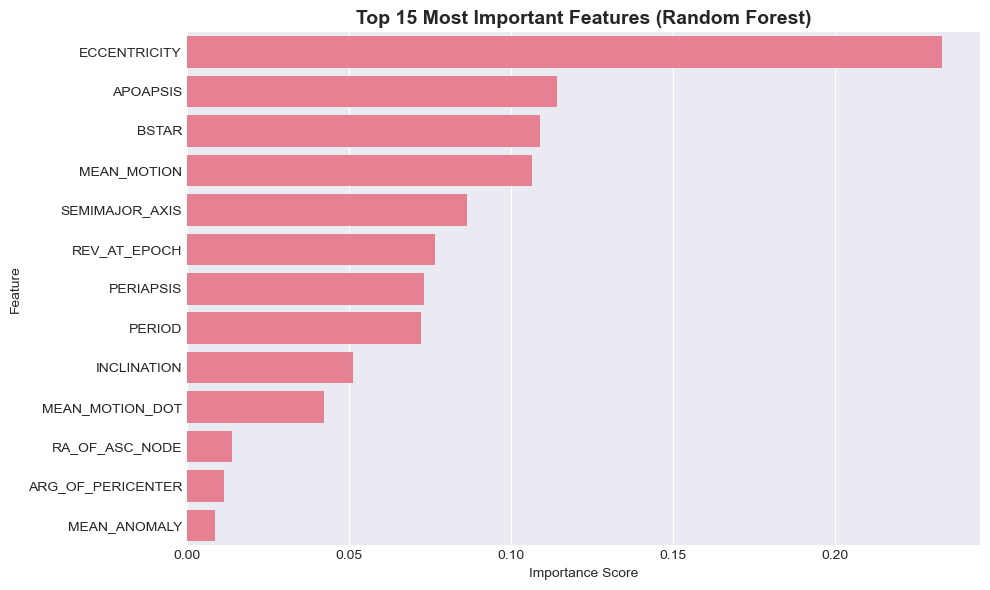

In [ ]:
# Feature Importance (Random Forest)
if target_column:
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
    plt.title('Top 15 Most Important Features (Random Forest)', fontsize=14, weight='bold')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()


### Model 3: Gradient Boosting (XGBoost)


In [ ]:
# Try importing XGBoost
try:
    import xgboost as xgb
    xgboost_available = True
except ImportError:
    print("XGBoost not installed. Install with: pip install xgboost")
    xgboost_available = False

if target_column and xgboost_available:
    # Train XGBoost
    xgb_model = xgb.XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1
    )
    xgb_model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred_xgb = xgb_model.predict(X_val_scaled)
    
    # Evaluation
    print("=" * 50)
    print("XGBOOST RESULTS")
    print("=" * 50)
    print(f"Validation Accuracy: {accuracy_score(y_val, y_pred_xgb):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred_xgb))


XGBoost not installed. Install with: pip install xgboost


### Model Comparison & Final Evaluation



MODEL COMPARISON
              Model  Accuracy
Logistic Regression      0.81
      Random Forest      0.93
            XGBoost      0.00


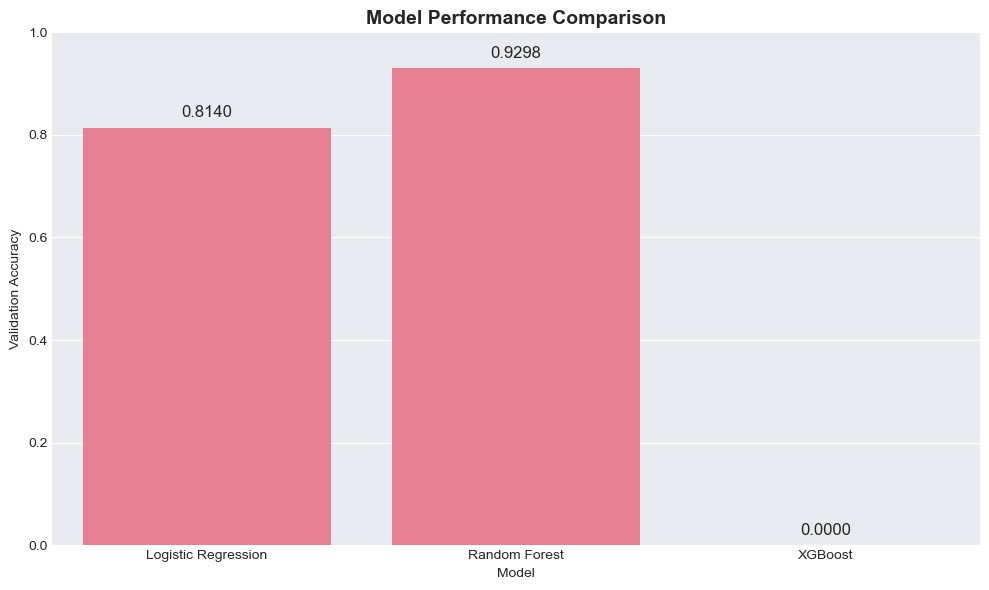

In [ ]:
# Compare all models
if target_column:
    results = pd.DataFrame({
        'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
        'Accuracy': [
            accuracy_score(y_val, y_pred_lr) if 'y_pred_lr' in locals() else 0,
            accuracy_score(y_val, y_pred_rf) if 'y_pred_rf' in locals() else 0,
            accuracy_score(y_val, y_pred_xgb) if 'y_pred_xgb' in locals() and xgboost_available else 0
        ]
    })
    
    print("\n" + "=" * 50)
    print("MODEL COMPARISON")
    print("=" * 50)
    print(results.to_string(index=False))
    
    # Visualize comparison
    plt.figure(figsize=(10, 6))
    sns.barplot(data=results, x='Model', y='Accuracy')
    plt.title('Model Performance Comparison', fontsize=14, weight='bold')
    plt.ylabel('Validation Accuracy')
    plt.ylim(0, 1)
    for i, v in enumerate(results['Accuracy']):
        plt.text(i, v + 0.02, f'{v:.4f}', ha='center', fontsize=12)
    plt.tight_layout()
    plt.show()


In [ ]:
# Select best model and evaluate on test set
if target_column:
    best_model_idx = results['Accuracy'].idxmax()
    best_model_name = results.loc[best_model_idx, 'Model']
    
    if best_model_name == 'Logistic Regression':
        best_model = lr_model
        y_test_pred = best_model.predict(X_test_scaled)
    elif best_model_name == 'Random Forest':
        best_model = rf_model
        y_test_pred = best_model.predict(X_test_scaled)
    else:
        best_model = xgb_model
        y_test_pred = best_model.predict(X_test_scaled)
    
    print("\n" + "=" * 50)
    print(f"FINAL TEST SET EVALUATION - {best_model_name}")
    print("=" * 50)
    print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))



FINAL TEST SET EVALUATION - Random Forest
Test Accuracy: 0.9365

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1265
           1       0.92      0.96      0.94       742
           2       0.90      0.55      0.69       112
           3       1.00      0.24      0.39        37

    accuracy                           0.94      2156
   macro avg       0.94      0.68      0.74      2156
weighted avg       0.94      0.94      0.93      2156



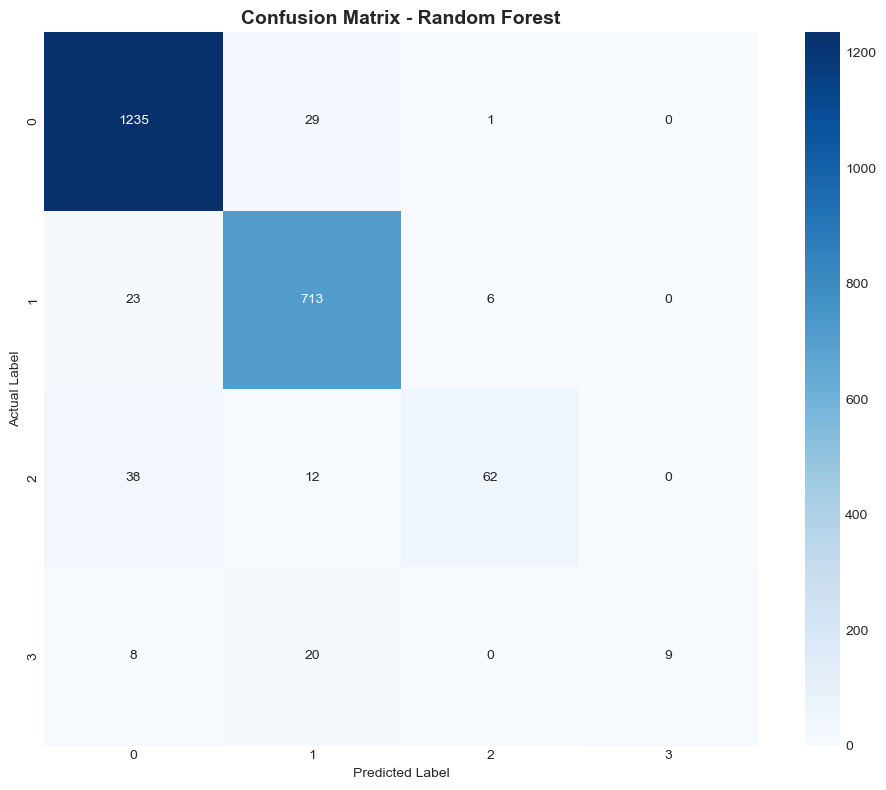

In [ ]:
# Confusion Matrix for best model
if target_column and y.nunique() <= 10:
    cm = confusion_matrix(y_test, y_test_pred)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True)
    plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, weight='bold')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()


---
## Key Takeaways & Best Practices

### Data Cleaning:
- Always check for missing values and understand why they're missing
- Remove duplicates to avoid inflated metrics
- Be cautious with outlier removal in specialized domains

### Preprocessing:
- Scale features for distance-based algorithms
- Encode categorical variables appropriately
- Handle class imbalance if present

### Modeling:
- Always split data before any preprocessing
- Start with simple baseline models
- Use cross-validation for robust evaluation
- Monitor for overfitting (train vs validation performance)

### Common Pitfalls:
1. **Data Leakage**: Fitting on entire dataset before splitting
2. **Ignoring Class Imbalance**: Can lead to biased models
3. **Not Scaling Data**: Affects distance-based algorithms
4. **Overfitting**: Model performs well on training but poorly on new data
5. **Not Understanding Domain**: Generic approaches may miss domain-specific patterns


---
## Next Steps

1. **Hyperparameter Tuning**: Use GridSearchCV or RandomizedSearchCV
2. **Feature Engineering**: Create more domain-specific features
3. **Ensemble Methods**: Combine multiple models
4. **Cross-Validation**: K-fold validation for robust estimates
5. **Deep Learning**: If dataset is large enough, try neural networks
6. **Model Deployment**: Save model and create prediction pipeline


In [ ]:
# Save the best model
import pickle

if target_column:
    # Save model
    with open('best_model.pkl', 'wb') as f:
        pickle.dump(best_model, f)
    
    # Save scaler
    with open('scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)
    
    print("Model and scaler saved successfully!")
    print("Files created: best_model.pkl, scaler.pkl")


Model and scaler saved successfully!
Files created: best_model.pkl, scaler.pkl


In [ ]:
# Example: Making predictions on new data
if target_column:
    print("\nExample: Making predictions on new data")
    print("=" * 50)
    
    # Load saved model
    with open('best_model.pkl', 'rb') as f:
        loaded_model = pickle.load(f)
    
    with open('scaler.pkl', 'rb') as f:
        loaded_scaler = pickle.load(f)
    
    # Make prediction on first test sample
    sample = X_test.iloc[0:1]
    sample_scaled = loaded_scaler.transform(sample)
    prediction = loaded_model.predict(sample_scaled)
    
    print(f"Sample features: {sample.to_dict('records')[0]}")
    print(f"\nPredicted class: {prediction[0]}")
    print(f"Actual class: {y_test.iloc[0]}")



Example: Making predictions on new data
Sample features: {'MEAN_MOTION': 12.96964393, 'ECCENTRICITY': 0.0026771, 'INCLINATION': 90.273, 'RA_OF_ASC_NODE': 325.7206, 'ARG_OF_PERICENTER': 182.0403, 'MEAN_ANOMALY': 178.0613, 'BSTAR': 0.0017732, 'MEAN_MOTION_DOT': 5.19e-06, 'SEMIMAJOR_AXIS': 7652.144, 'PERIOD': 111.028, 'APOAPSIS': 1294.495, 'PERIAPSIS': 1253.524, 'REV_AT_EPOCH': 36475}

Predicted class: 0
Actual class: 0


---
## Summary

This notebook demonstrated a complete machine learning pipeline:

1. ✅ **Data Loading**: Imported and explored the space decay dataset
2. ✅ **Data Cleaning**: Handled missing values, duplicates, and outliers
3. ✅ **Preprocessing**: Scaled features and encoded categorical variables
4. ✅ **EDA**: Visualized distributions, correlations, and relationships
5. ✅ **Feature Engineering**: Created new meaningful features
6. ✅ **Modeling**: Trained and compared multiple classification algorithms
7. ✅ **Evaluation**: Assessed performance using multiple metrics
8. ✅ **Deployment**: Saved model for future predictions

**Remember**: Machine learning is iterative. Keep experimenting with different features, algorithms, and parameters!
